In [123]:
import pandas as pd  # needed to parse analysis data
import altair as alt  # needed for visualization
import os  # needed for audio path manipulation
import urllibalt.renderers.enable('notebook')

In [232]:
data = pd.read_csv('audio_quality.csv', index_col=0)
metadata = pd.read_csv('spokenweb metadata.csv')[['author', 'date', 'url', 'year', 'filename']]

In [236]:
data = data.merge(metadata, on='filename')

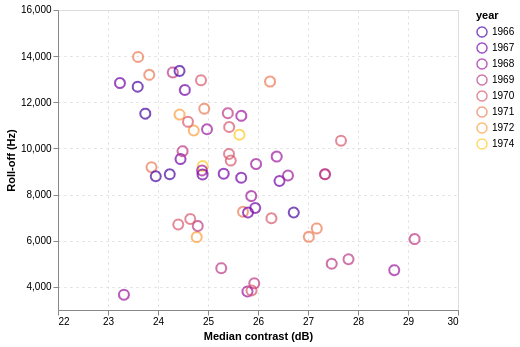

In [281]:
chart = alt.Chart(data).mark_point(size=100).encode(
    alt.X('contrast_50:Q',
        scale=alt.Scale(zero=False, domain=(22, 30)),
        axis=alt.Axis(title='Median contrast (dB)')
    ),
    alt.Y('rolloff_75:Q',
        scale=alt.Scale(zero=False, domain=(3000, 16000)),
        axis=alt.Axis(title='Roll-off (Hz)')
    ),
    tooltip=['author', 'date', 'contrast_25', 'contrast_50', 'contrast_75'],
    href='url',
    color=alt.Color('year:O', scale=alt.Scale(scheme='plasma'))
).configure_axis(gridDash=(2, 4))

chart